# Zápočtová úloha – Úloha 3: Monte‑Carlo simulace problému Monty Hall
*Autor: Zdeněk Touška*  

**Cíl:** ověřit **pravděpodobnost výhry** ve známém problému se třemi dveřmi pomocí Monte‑Carlo simulace a vizualizovat konvergenci výsledků.
Model spadá do kategorie **pravděpodobnostních Monte‑Carlo modelů**, jak požaduje zadání.

## 1 · Pravidla hry Monty Hall
1. Za **jedněmi** ze tří dveří je automobil (výhra), za dalšími dvěma koza.
2. Hráč si vybere **jedny** dveře. (Pravděpodobnost, že zvolil auto, je $\tfrac{1}{3}$.)
3. Moderátor otevře **jiné** dveře s kozou.
4. Hráč má možnost **zůstat** u původní volby *(strategie Stay)* **nebo** **přeskočit** na zbývající zavřené dveře *(strategie Switch)*.

Teoreticky platí:
\[
P(\text{výhra | stay}) = \frac{1}{3}, \qquad
P(\text{výhra | switch}) = \frac{2}{3}.
\]
Cílem je tyto hodnoty numericky potvrdit.

## 2 · Importy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3 · Funkce pro jeden pokus

In [ ]:
def monty_trial(switch=True, n_doors=3):
    """Vrací True, pokud hráč vyhraje auto v jednom kole.
    switch=True => hráč vždy změní dveře.
    n_doors=3 (lze rozšířit na N dveří)."""
    # 1 = auto, 0 = koza
    doors = np.zeros(n_doors, dtype=int)
    doors[np.random.randint(n_doors)] = 1  # náhodné umístění auta
    choice = np.random.randint(n_doors)    # hráčova volba

    # Moderátor otevře jednu kozu (v N‑door verzi otevírá všechny kromě jedné)
    if n_doors == 3:
        possible = [i for i in range(n_doors) if i != choice and doors[i] == 0]
        monty = np.random.choice(possible)
        remaining = [i for i in range(n_doors) if i not in (choice, monty)]
    else:
        # otevře k-2 koz, nechá původní a jednu skrytou
        remaining = [i for i in range(n_doors) if i != choice]
        opened = np.random.choice([i for i in remaining if doors[i] == 0], size=n_doors-2, replace=False)
        remaining = [i for i in remaining if i not in opened]

    final_choice = choice if not switch else remaining[0]
    return doors[final_choice] == 1


## 4 · Simulace mnoha her

In [8]:
def simulate_games(n_games=10000, n_doors=3):
    stay_wins = np.mean([monty_trial(False, n_doors) for _ in range(n_games)])
    switch_wins = np.mean([monty_trial(True, n_doors)  for _ in range(n_games)])
    return stay_wins, switch_wins

stay, switch = simulate_games(100_000)
print(f'Po 100k hrách:  stay = {stay:.3f},  switch = {switch:.3f}')

Po 100k hrách:  stay = 0.333,  switch = 0.666


## 5 · Konvergence pravděpodobností

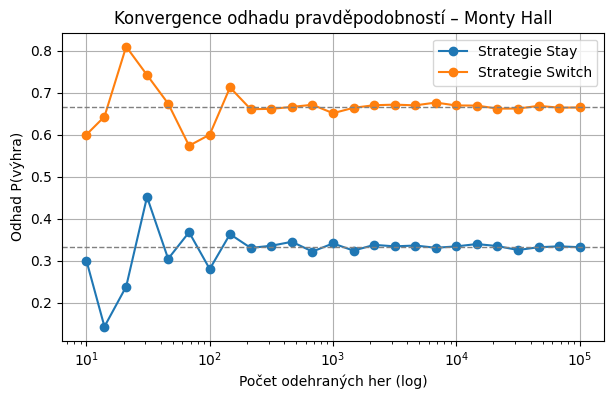

In [9]:
steps = np.logspace(1, 5, 25, dtype=int)  # od 10 do 100 000
stay_p, switch_p = [], []
for n in steps:
    s, w = simulate_games(n)
    stay_p.append(s)
    switch_p.append(w)

plt.figure(figsize=(7,4))
plt.semilogx(steps, stay_p, 'o-', label='Strategie Stay')
plt.semilogx(steps, switch_p, 'o-', label='Strategie Switch')
plt.axhline(1/3, color='grey', ls='--', lw=1)
plt.axhline(2/3, color='grey', ls='--', lw=1)
plt.xlabel('Počet odehraných her (log)')
plt.ylabel('Odhad P(výhra)')
plt.title('Konvergence odhadu pravděpodobností – Monty Hall')
plt.legend(); plt.grid(True); plt.show()

## 6 · Rozšíření: N dveří

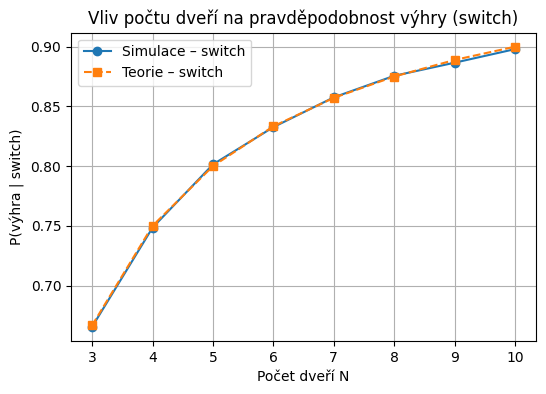

In [10]:
def theoretical_switch_prob(n_doors):
    return (n_doors - 1) / n_doors

n_values = np.arange(3, 11)
sim_probs = [simulate_games(50_000, n)[1] for n in n_values]
theo_probs = [theoretical_switch_prob(n) for n in n_values]

plt.figure(figsize=(6,4))
plt.plot(n_values, sim_probs, 'o-', label='Simulace – switch')
plt.plot(n_values, theo_probs, 's--', label='Teorie – switch')
plt.xlabel('Počet dveří N')
plt.ylabel('P(výhra | switch)')
plt.title('Vliv počtu dveří na pravděpodobnost výhry (switch)')
plt.legend(); plt.grid(True); plt.show()

## 7 · Interpretace výsledků
- **Strategie Switch** konverguje k ≈ 0.666, **Stay** k ≈ 0.333, potvrzujíce teorií odhadnuté hodnoty.
- U N‑dveřové verze pravděpodobnost při přepnutí roste na $(N-1)/N$ a simulace tento trend kopíruje.

### Proč switch funguje?
Před otevřením dveří má hráč pravděpodobnost $1/N$ na auto. Po moderátorově tahu se **celá zbylá pravděpodobnost** $(N-1)/N$ přesune na jediné ještě neotevřené dveře, takže přepnutím hráč tuto pravděpodobnost plně využije.

### Možné rozšíření
- Interaktivní widget pro volbu **N** a okamžité přepočítání.
- Simulace **adaptivního** hráče (rozhoduje se podle minulé úspěšnosti).
- Vizuální animace průběhu jedné hry pro výukové účely.